Test running sixdb in Python3 interactively

In [1]:
# In case there is a bug with auto completion of paths, temp bugfix according to
# https://github.com/ipython/ipykernel/issues/299
%config Completer.use_jedi=False 

# add location of SixDeskDB for Python 3+ to module search path
import sys
# (example) set path to your sixdeskdb folder
sys.path.append("/afs/cern.ch/work/m/mtitze/hl-lhc/git/SixDeskDB/") 

import sixdeskdb as sdb

%config InlineBackend.figure_format = 'retina'  # sharp plots

In [2]:
# to update functions if they are modified externally
%load_ext autoreload
%autoreload 2

In [3]:
# set a name for the sixdesk SQL database to be analyzed.
study_name = '/afs/cern.ch/work/m/mtitze/hl-lhc/testbed/test_study/lhc_b1_inj_2016_qp_14_ioct_20_emit_3.57_2.87.db'
#study_name = '/afs/cern.ch/work/m/mtitze/hl-lhc/testbed/test_study/lhc_b1_inj_2016_qp_14_ioct_20_emit_3.57_2.87_original.db'

In [15]:
study_database = sdb.SixDeskDB(dbname=study_name)

Opened /afs/cern.ch/work/m/mtitze/hl-lhc/testbed/test_study/lhc_b1_inj_2016_qp_14_ioct_20_emit_3.57_2.87.db successfully


In [5]:
study_database.inspect_results()

SELECT DISTINCT seed FROM six_input
seed (1, 60, 1)
SELECT DISTINCT tunex FROM six_input
tunex (64.27, 64.27, None)
SELECT DISTINCT tuney FROM six_input
tuney (59.295, 59.295, None)
SELECT DISTINCT amp1 FROM six_input
amp1 (1.0, 11.0, 1.0)
SELECT DISTINCT amp2 FROM six_input
amp2 (2.0, 12.0, 1.0)
SELECT DISTINCT turns FROM six_input
turns ('e5', 'e5', None)
SELECT DISTINCT angle FROM six_input
angle (7.5, 82.5, 7.5)


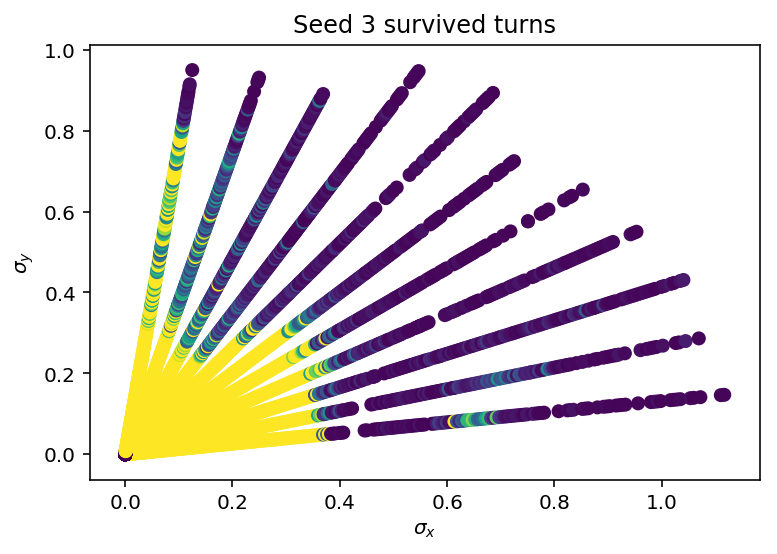

In [6]:
study_database.plot_survival_2d(seed=3)

### new method

In [16]:
# run sixdesk with a set of unequal emittances
emittances_x = [1.11, 1.53]
emittances_y = [3.48, 2.71, 2.42]

emittances_x = [3.57]
emittances_y = [2.87]

method = 1

sdb.RunDaVsTurns_ue(study_database, turnstep=100, emitx=emittances_x, emity=emittances_y, method=method)

REGEMI  = 3.75
EMITX   = [3.57]
EMITY   = [2.87]
METHOD  = 1
analyzing seed 60/60, tune (64.27, 59.295) ...
Time elapsed: 11.224962 [s]
flattening 60 cases & storing results to SQL database ...
... saving da_vst to database (recreate = True)
keys: ['seed', 'tunex', 'tuney', 'emitx', 'emity', 'nturn']


### old method

In [13]:
# check if da table exists in database. In case of problems, remove table da_vst
# in SQL database (e.g. with the script below)
study_database.check_table('da_vst')

ProgrammingError: Cannot operate on a closed database.

In [34]:
# run original sixdesk with a set of unequal emittances as countercheck. 
emittances_x = [3.57]
emittances_y = [2.87]

# define default values
force      = True # set to true to check calculation speed
turnstep   = 100
outfile    = False
outfileold = False
outfilefit = False
davstfit   = False
fitdat     = 'dawsimp'
fitdaterr  = 'dawsimperr'
fitndrop   = 25
fitskap    = -5.0
fitekap    = 5.0
fitdkap    = 0.01
     

turnstep= 100

outfile=True
outfileold=True 
outfilefit=True
   
davstfit=False # True may lead to a problem

sdb.RunDaVsTurns(study_database ,force, outfile, outfileold, turnstep, davstfit, fitdat, fitdaterr,
                    fitndrop, fitskap, fitekap, fitdkap, outfilefit, emitx=emittances_x[0], emity=emittances_y[0])

REGEMI  = 3.75
EMITX   = 3.57
EMITY   = 2.87
analyzing seed 1 ...
analyzing tune (64.27, 59.295) ...
... get survival data
... getting survival data
... get da vs turns data
... get da vs turns data
... calculate da vs turns
.... save data in database
... save survival data in dares_chrom-14.0-20.0/1/64.27_59.295/DAsurv.5.out
... save survival data in dares_chrom-14.0-20.0/1/64.27_59.295/DAsurv.5.out
... saving da vs turns data in dares_chrom-14.0-20.0/1/64.27_59.295/DA.5.out
... save da vs turns data in dares_chrom-14.0-20.0/1/64.27_59.295/DA.5.out
... save da vs turns (old data format) data in dares_chrom-14.0-20.0/1/64.27_59.295/DAold.5.out
... save da vs turns (old data format) data in dares_chrom-14.0-20.0/1/64.27_59.295/DAold.5.out
analyzing seed 2 ...
analyzing tune (64.27, 59.295) ...
... get survival data
... getting survival data
... get da vs turns data
... get da vs turns data
... calculate da vs turns
.... save data in database
... save survival data in dares_chrom-14.0-20

In [8]:
# if necessary, drop tables
import itertools

import sqlite3

def drop_from_sql_database(filename, remove=['da_vst', 'fit_parameters'], verbose=True):
    '''
    This is a temporarily solution. We can remove tables from a sixdesk database
    in order to force/ensure that the values are re-computed if there is a change.
    '''
    if verbose:
        print ('Dropping {} from SQL database\n {}'.format(remove, filename))
    
    connection = sqlite3.connect(filename)
    cursor = connection.cursor()
    for table_name in remove:
        try:
            cursor.execute("DROP TABLE {}".format(table_name))
        except:
            print ('Problem with table {}'.format(table_name))
            continue
    connection.close()

In [9]:
#to_remove = []
#for ex, ey in itertools.product(emittances_x, emittances_y):
#    to_remove.append('da_vst_{}_{}'.format(ex, ey).replace('.', ''))

#drop_from_sql_database(study_name, remove=to_remove)
drop_from_sql_database(study_name)

Dropping ['da_vst', 'fit_parameters'] from SQL database
 /afs/cern.ch/work/m/mtitze/hl-lhc/testbed/test_study/lhc_b1_inj_2016_qp_14_ioct_20_emit_3.57_2.87.db
